In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# for multi-class classification also OVR is used in SVC

In [54]:
# let's create synthetic datapoints :
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1,n_redundant=0 )

In [55]:
X

array([[-2.58809691, -1.87248346],
       [ 1.45932945, -0.7232735 ],
       [-0.69944444, -0.81429052],
       ...,
       [-0.07623051, -1.88754442],
       [-1.90651371, -1.57953679],
       [ 0.36221272, -1.709308  ]])

In [56]:
y

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,

In [57]:
x1 = pd.DataFrame(X)[0]
x2 = pd.DataFrame(X)[1]

<Axes: xlabel='0', ylabel='1'>

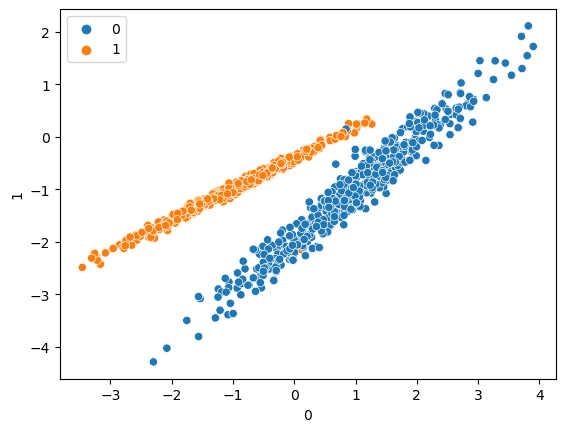

In [58]:
sns.scatterplot(x=x1,y=x2,hue=y)

In [59]:
# we will use linear SVC by understanding the linear pattern in the data

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.svm import SVC 

In [62]:
# i can also play with hyperparameter tuning during model training
# in this scenario i can use kernel = "linear" 

# i can use diff-diff kernel by watching pattern in the data
# types -fo kernel can be : 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
svc = SVC(kernel='linear')

In [63]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [64]:
y_pred = svc.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       102
           1       0.99      1.00      0.99        98

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [67]:
confusion_matrix(y_test,y_pred)

array([[101,   1],
       [  0,  98]], dtype=int64)

In [68]:
# try to check the model performcance by training the model through diff-diff kernel
# whichever has a high performance it will be used finally

# use hyperparameter tuning to effectively select kernel value 

In [69]:
# then i can do hyperparameter tuning 

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C' : [0,1,1,10,100,1000],
    'gamma': [1,0.1,0.01,0.001,0.0001],
    'kernel' : ['rbf']
}

In [71]:
grid = GridSearchCV(svc,param_grid, cv=5, verbose=3,refit=True)

In [72]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ............C=0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END ..........C=0, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ..........C=0, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END ..........C=0, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END ..........C=0, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ..........C=0, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END .........C=0, gamma=0.01, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END .........C=0, gamma=0.01, kernel=r

[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.988 total time=   0.0s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.994 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.994 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.988 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.994 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.994 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.988 total time=   0.0s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=1000, 

D:\Anacondaa\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anacondaa\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anacondaa\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "D:\Anacondaa\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "D:\Anacondaa\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parame

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0, 1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [73]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [74]:
grid.best_score_

0.9949999999999999